<a href="https://colab.research.google.com/github/angiecoronel12/Sleep_Stage/blob/main/2_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. **Preprocesamiento de los datos**



In [1]:
# Carga de las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carga de los datos ()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# La ruta al archivo HDF5
hdf5_file_path = '/content/drive/My Drive/Deep_learning_proyecto/Signals_10_subjects/data.h5'

# Leer los DataFrames
data_frames = []
with pd.HDFStore(hdf5_file_path) as store:
    for i in range(20):
        df = store.get(f'df{i+1}')
        data_frames.append(df)

In [4]:
print(f'Número de DataFrames en la lista: {len(data_frames)}')

Número de DataFrames en la lista: 20


## A. Eliminar outliers

In [5]:
# Función para eliminar outliers usando z-score (4 veces el valor de su std)
def eliminar_outliers(df, threshold=4):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > threshold).any(axis=1)
    num_outliers = outliers.sum()
    df_sin_outliers = df[~outliers]
    return df_sin_outliers, num_outliers, outliers


## B. Aplicar Moving Average a las caracteristicas

In [6]:
# Aplicar un promedio movil a las caracteristicas (equivalente a un filtro pasa bajas)
def aplicar_moving_average(data, window_size=5):
    total_samples = len(data)
    moving_averages = []

    for i in range(total_samples):
        if i < window_size:
            # Para los primeros valores, usa los valores disponibles
            if i < total_samples - 1:
                window = data[i:i + window_size]
            else:
                window = data[i:]
        else:
            # Usa las muestras anteriores para el promedio móvil
            window = data[i - window_size + 1:i + 1]

        window_average = window.mean()
        moving_averages.append(window_average)

    # Convertir la lista de promedios móviles en un DataFrame
    moving_averages_df = pd.DataFrame(moving_averages, index=data.index, columns=data.columns)

    return moving_averages_df

A cada columna de cada dataframe se le aplica remoción de outlyers y un suavizado de las caracteristicas, usando una ventana de 3 muestras.

In [7]:
hdf5_file_path = '/content/drive/My Drive/Deep_learning_proyecto/Signals_10_subjects/data_process_2.h5'

# Lista para almacenar los DataFrames procesados
data_frames_procesados = []

with pd.HDFStore(hdf5_file_path) as store:
    for i, df in enumerate(data_frames):
        # Separar las características y la etiqueta
        features = df.iloc[:, :-1]
        labels = df.iloc[:, -1]

        # Eliminar outliers y contar los outliers eliminados
        features_sin_outliers, num_outliers, outliers_mask = eliminar_outliers(features)
        print(f'Número de outliers eliminados en df{i+1}: {num_outliers}')

        # Eliminar las mismas filas de las etiquetas
        labels_sin_outliers = labels[~outliers_mask]

        # Aplicar el promedio móvil
        features_suavizadas = aplicar_moving_average(features_sin_outliers, 3)

        # Combinar las características suavizadas con las etiquetas filtradas
        df_final = pd.concat([features_suavizadas.reset_index(drop=True), labels_sin_outliers.reset_index(drop=True)], axis=1)
        print(df_final.shape)

        # Guardar el DataFrame resultante en el archivo HDF5
        store.put(f'df{i+1}', df_final, format='table')

        # Añadir el DataFrame procesado a la lista
        data_frames_procesados.append(df_final)

Número de outliers eliminados en df1: 81
(681, 34)
Número de outliers eliminados en df2: 118
(934, 34)
Número de outliers eliminados en df3: 82
(939, 34)
Número de outliers eliminados en df4: 109
(1000, 34)
Número de outliers eliminados en df5: 100
(840, 34)
Número de outliers eliminados en df6: 78
(848, 34)
Número de outliers eliminados en df7: 80
(789, 34)
Número de outliers eliminados en df8: 85
(747, 34)
Número de outliers eliminados en df9: 111
(1082, 34)
Número de outliers eliminados en df10: 127
(1035, 34)
Número de outliers eliminados en df11: 78
(719, 34)
Número de outliers eliminados en df12: 111
(1060, 34)
Número de outliers eliminados en df13: 78
(688, 34)
Número de outliers eliminados en df14: 98
(857, 34)
Número de outliers eliminados en df15: 95
(822, 34)
Número de outliers eliminados en df16: 90
(821, 34)
Número de outliers eliminados en df17: 111
(900, 34)
Número de outliers eliminados en df18: 90
(891, 34)
Número de outliers eliminados en df19: 86
(952, 34)
Número de 

## C. Visualización de las caracteristicas

In [12]:
data_s1 = data_frames_procesados[0]

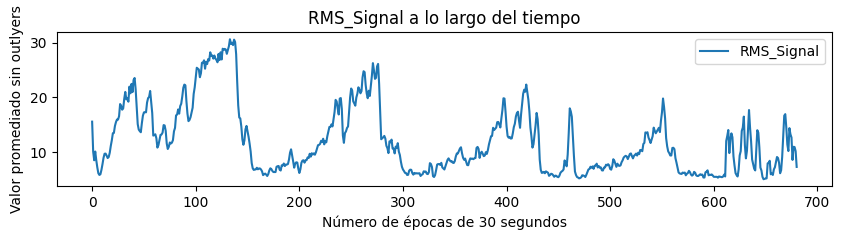

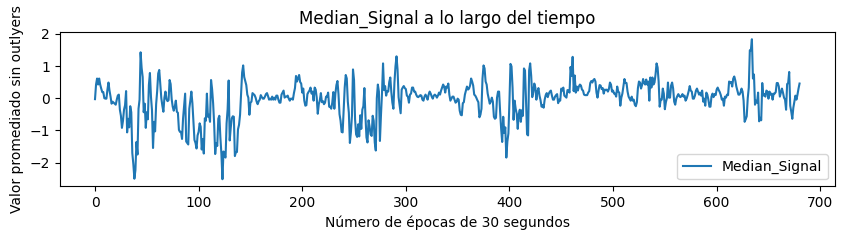

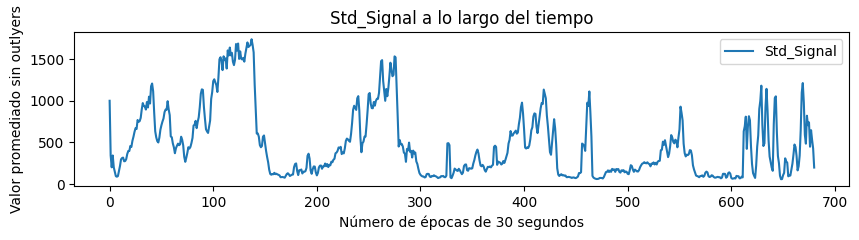

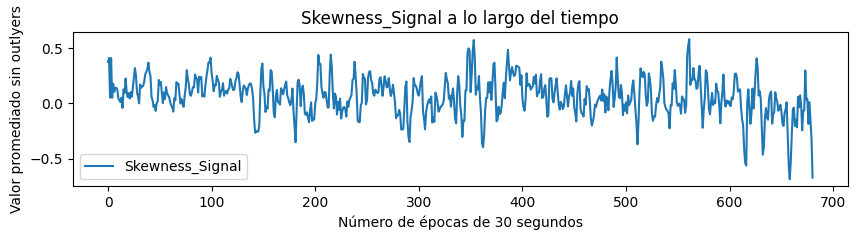

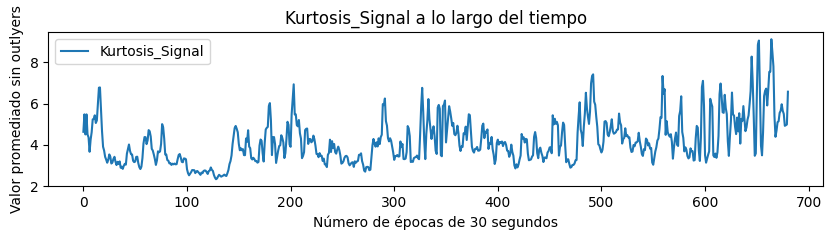

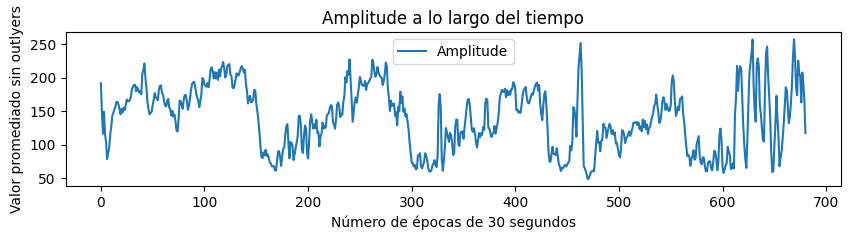

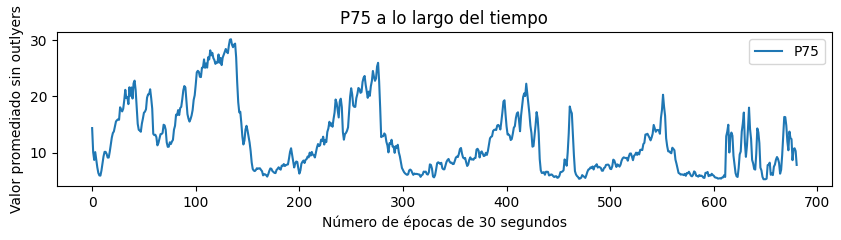

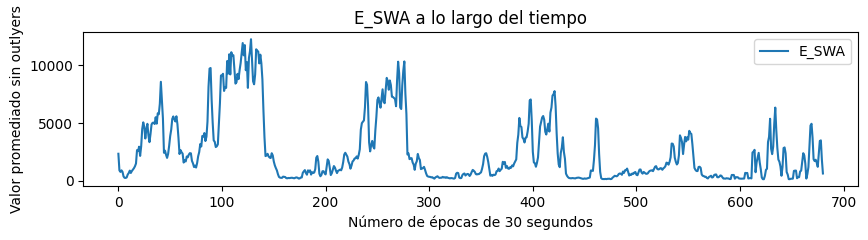

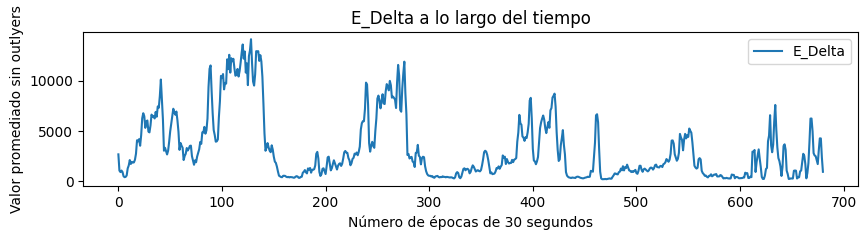

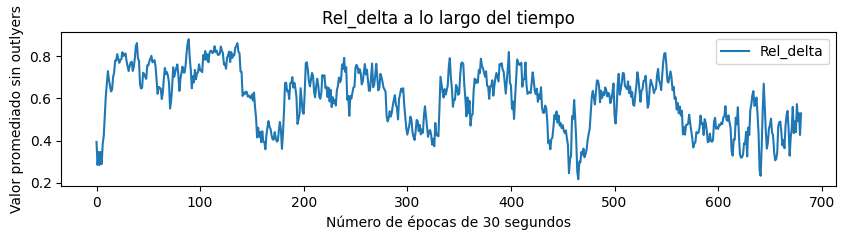

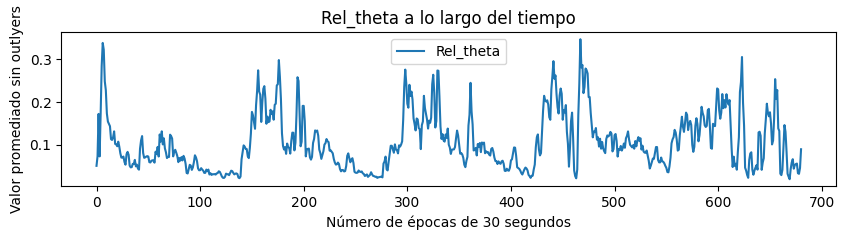

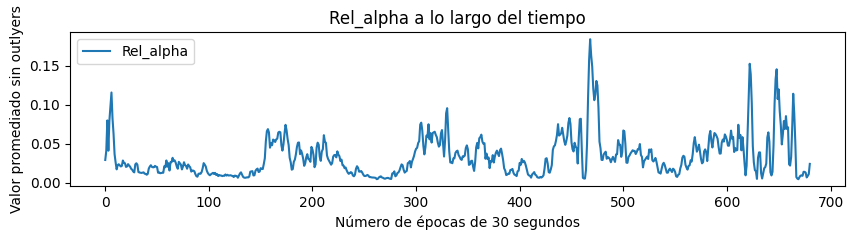

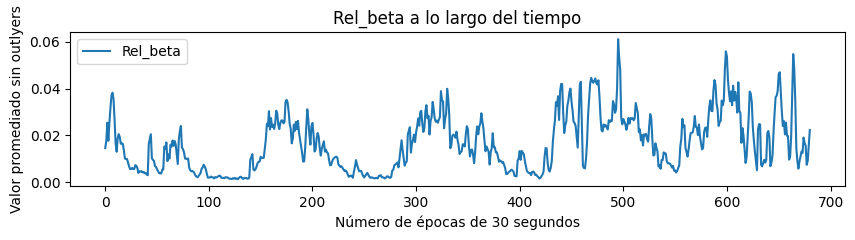

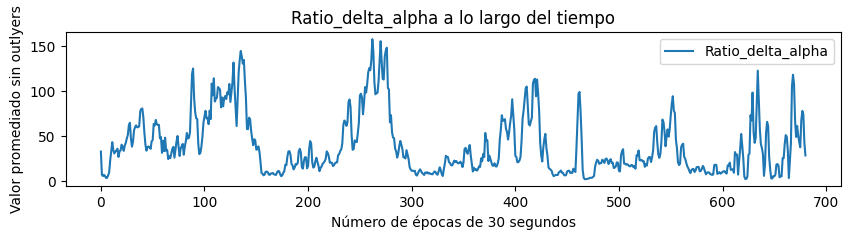

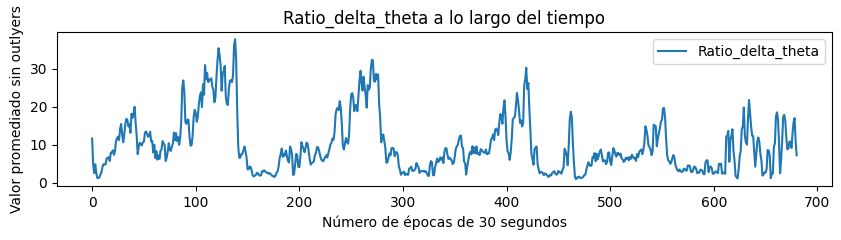

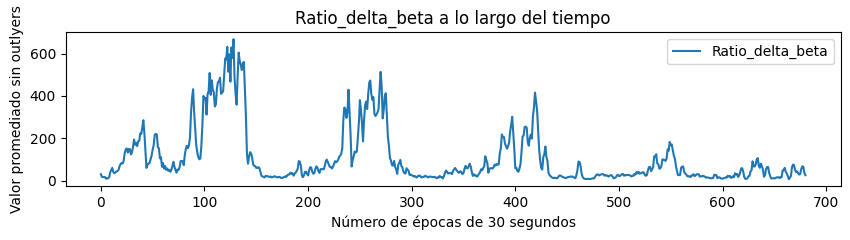

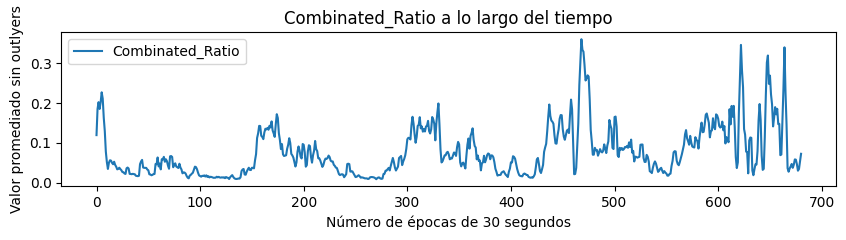

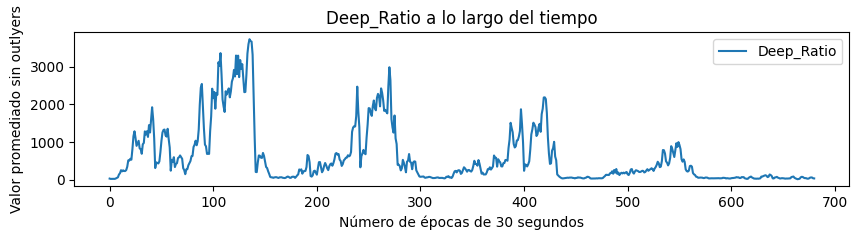

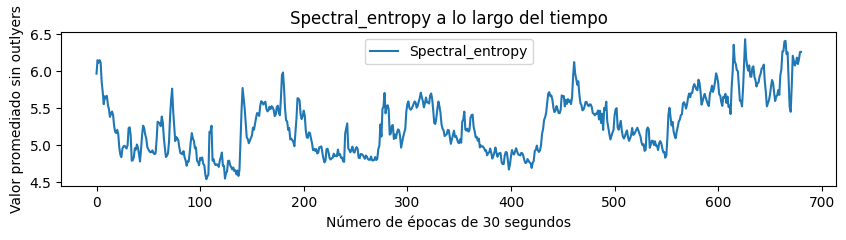

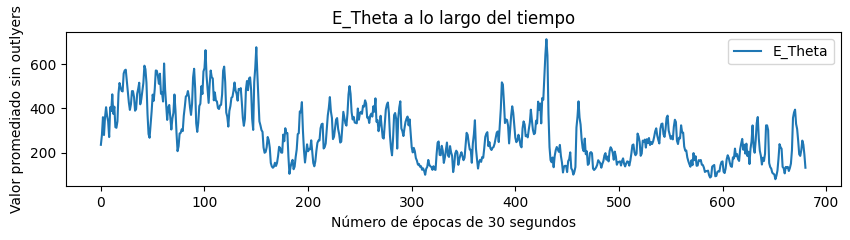

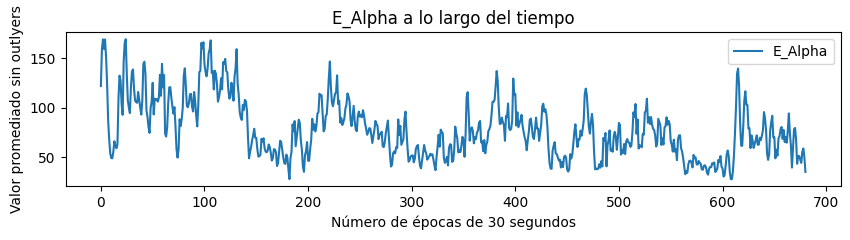

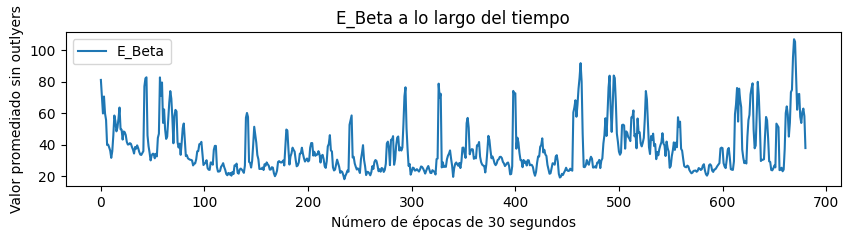

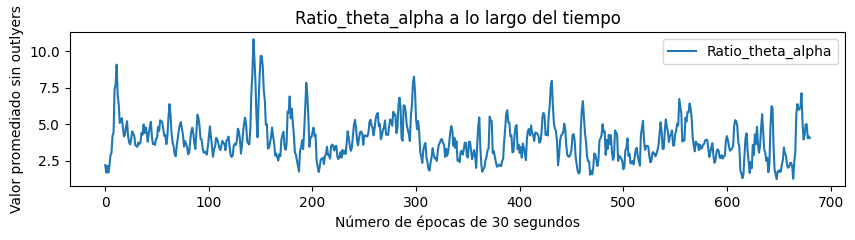

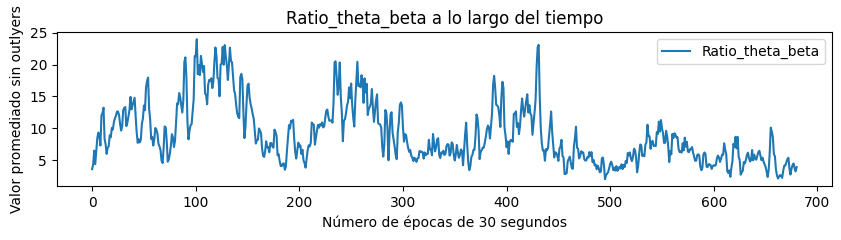

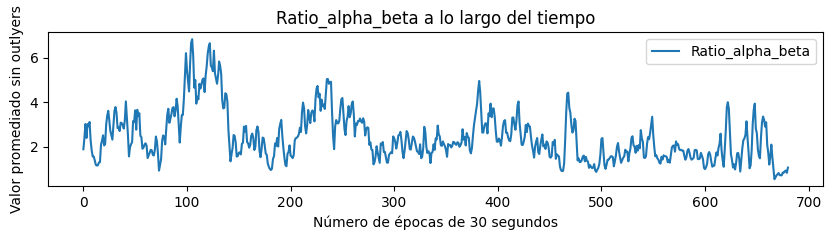

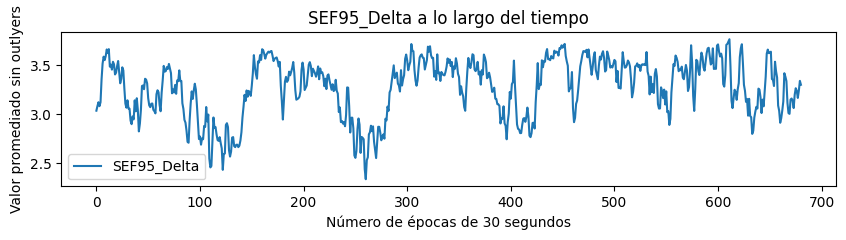

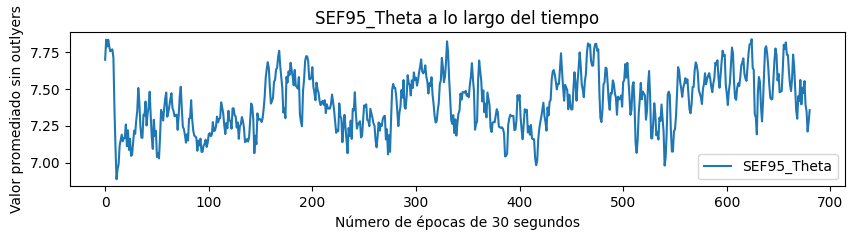

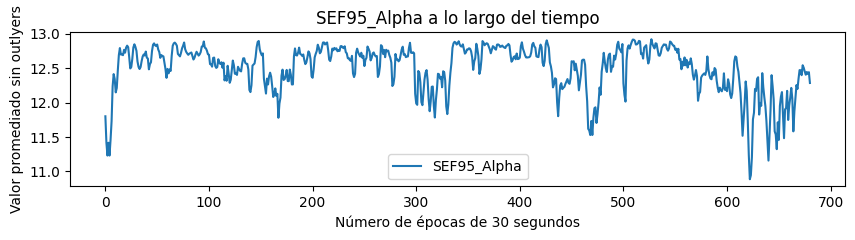

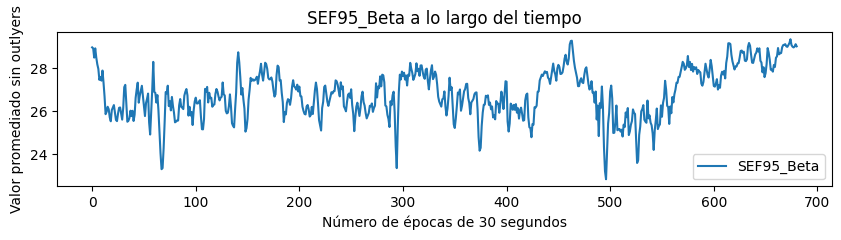

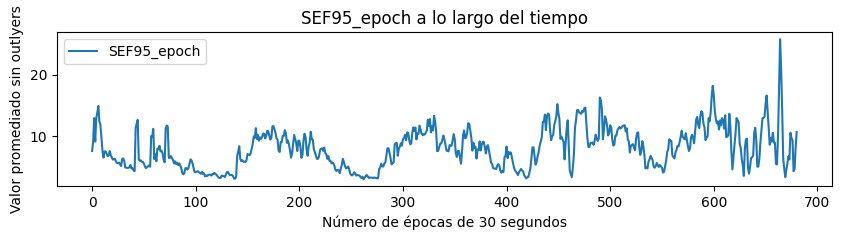

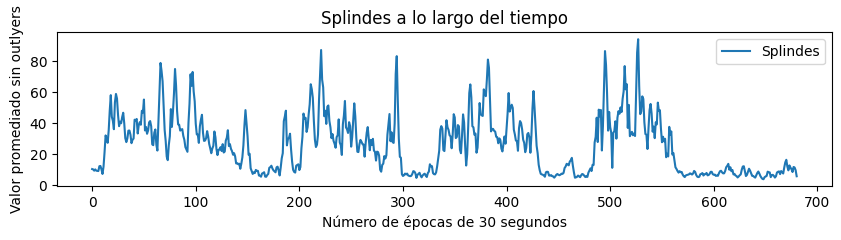

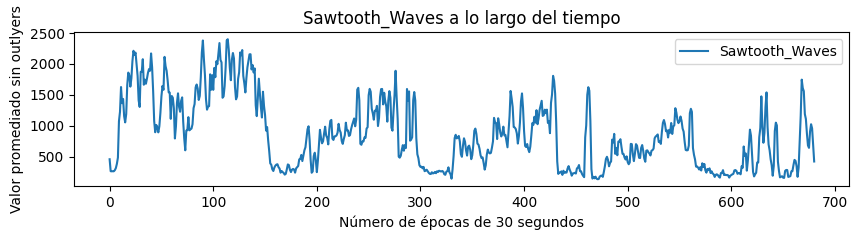

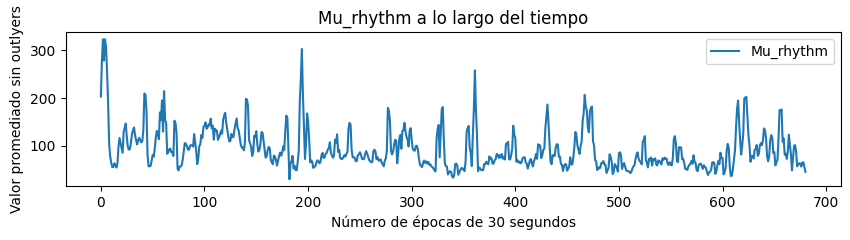

In [8]:
# Crear una variable de tiempo basada en el número de épocas
tiempo = range(data_s1.shape[0])

# Graficar cada columna en el tiempo
for columna in data_s1.columns[:-1]:
    plt.figure(figsize=(10, 2))
    plt.plot(tiempo, data_s1[columna], label=columna)
    plt.title(columna + " a lo largo del tiempo")
    plt.xlabel("Número de épocas de 30 segundos")
    plt.ylabel("Valor promediado sin outlyers")
    plt.legend()
    plt.show()